In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
from matplotlib.ticker import FuncFormatter

In [59]:
breast_df = pd.read_csv("../../results/manuscript/breast_significance_drop_per_tf_degree.csv", index_col=0)
testis_df = pd.read_csv("../../results/manuscript/testis_significance_drop_per_tf_degree.csv", index_col=0)
kidney_df = pd.read_csv("../../results/manuscript/kidney_significance_drop_per_tf_degree.csv", index_col=0)
precision_df = pd.read_csv("../../results/manuscript/precision_results_against_collectri.csv")
precision_df = precision_df.replace({"all" : "GRNBoost2", "signif" : "SignifiKANTE"})
precision_df

,tissue,type,precision
0,Breast,GRNBoost2,0.000884
1,Breast,SignifiKANTE,0.001083
2,Breast,GRNBoost2,0.000851
3,Breast,SignifiKANTE,0.001370
4,Breast,GRNBoost2,0.000638
5,Breast,SignifiKANTE,0.001080
6,Breast,GRNBoost2,0.000675
7,Breast,SignifiKANTE,0.001014
8,Breast,GRNBoost2,0.000833
9,Breast,SignifiKANTE,0.001034


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Kidney_GRNBoost2 vs. Kidney_SignifiKANTE: Wilcoxon test (paired samples), P_val:9.766e-03 Stat=3.000e+00
Breast_GRNBoost2 vs. Breast_SignifiKANTE: Wilcoxon test (paired samples), P_val:1.953e-03 Stat=0.000e+00
Testis_GRNBoost2 vs. Testis_SignifiKANTE: Wilcoxon test (paired samples), P_val:3.711e-02 Stat=7.000e+00


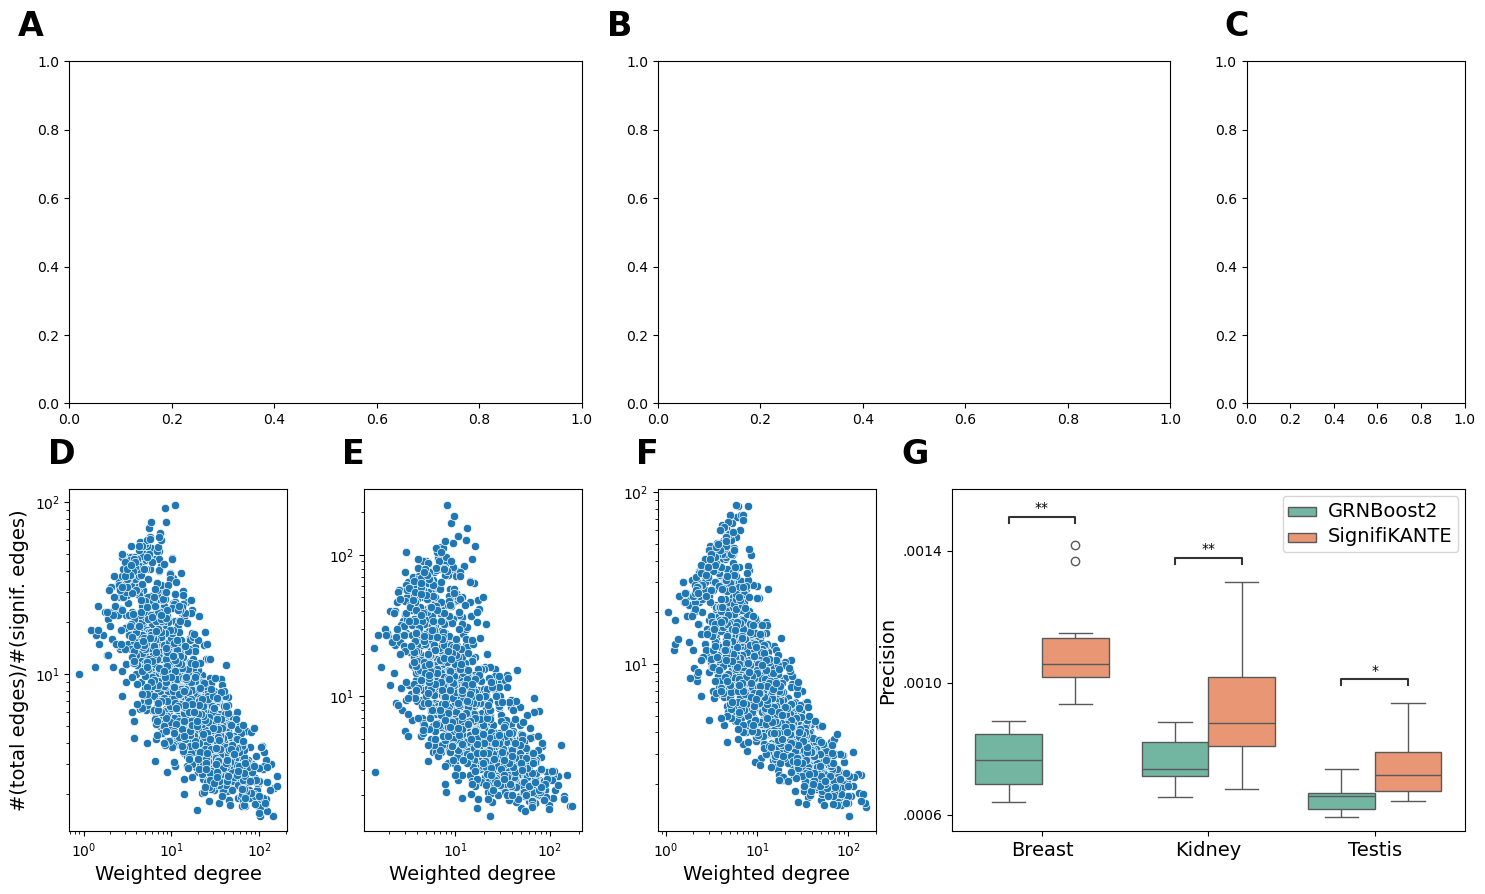

In [68]:
fig, axs = plt.subplot_mosaic([['A', 'A', 'B', 'B', 'C'], ['D', 'E', 'F', 'G', 'G']])
fig.set_size_inches(15, 9)
axs_list = list(axs.values())
label_fontsize = 14

sns.scatterplot(data=breast_df, x='Weighted degree per TF', y='#(total edges)/#(signif. edges) per TF', ax=axs['D'])
axs['D'].set_ylabel("#(total edges)/#(signif. edges)", fontsize=label_fontsize)
axs['D'].set_xlabel("Weighted degree", fontsize=label_fontsize)


sns.scatterplot(data=kidney_df, x='Weighted degree per TF', y='#(total edges)/#(signif. edges) per TF', ax=axs['E'])
axs['E'].set_ylabel("")
axs['E'].set_xlabel("Weighted degree", fontsize=label_fontsize)


sns.scatterplot(data=testis_df, x='Weighted degree per TF', y='#(total edges)/#(signif. edges) per TF', ax=axs['F'])
axs['F'].set_ylabel("")
axs['F'].set_xlabel("Weighted degree", fontsize=label_fontsize)

box = sns.boxplot(data=precision_df, x="tissue", y="precision", hue="type", ax=axs['G'], palette="Set2")
box.legend_.set_title(None)
for t in box.legend_.texts:
    t.set_fontsize(label_fontsize)   
axs['G'].tick_params(axis='x', labelsize=label_fontsize)
axs['G'].set_xlabel("")
axs['G'].set_ylabel("Precision", fontsize=label_fontsize)
axs['G'].set_yticks([0.0006, 0.001, 0.0014])
axs['G'].yaxis.set_major_formatter(
    FuncFormatter(lambda y, _: f"{y:.4f}".lstrip('0') if y != 0 else "0")
)

pairs = [
    (("Breast", "GRNBoost2"), ("Breast", "SignifiKANTE")),
    (("Kidney", "GRNBoost2"), ("Kidney", "SignifiKANTE")),
    (("Testis", "GRNBoost2"), ("Testis", "SignifiKANTE"))
]

annotator = Annotator(
    box, pairs,
    data=precision_df,
    x="tissue", y="precision", hue="type"
)

annotator.configure(
    test='Wilcoxon',   # or 'Mann-Whitney', 'Wilcoxon', etc.
    text_format='star',  # can also be 'simple', 'full', or 'pvalue'
           # place annotations above boxes
    comparisons_correction=None
)
annotator.apply_and_annotate()

axs['D'].set_xscale('log')
axs['D'].set_yscale('log')
axs['E'].set_xscale('log')
axs['E'].set_yscale('log')
axs['F'].set_xscale('log')
axs['F'].set_yscale('log')


labels = {'A': 'A', 'B': 'B', 'C': 'C', 'D' : 'D', 'E' : 'E', 'F' : 'F', 'G' : 'G'}

for key, label in labels.items():
    ax = axs[key]
    ax.text(
        -0.1, 1.15, label,  # x, y (in axes fraction coords)
        transform=ax.transAxes,
        fontsize=24,
        fontweight='bold',
        va='top',
        ha='left'
    )
   
fig.tight_layout()
fig.subplots_adjust(hspace=0.25, wspace=0.35)
plt.savefig("precision_accuracy_plot.pdf")